# Artificial Neural Networks intro - ANN

This notebook is introduction into Artificial Neural Networks, first part is describing basic theory about ANN and second part is showing some simple models using TensorFlow & Keras.

_________________

## Theory

<div class="alert alert-block alert-warning"><b>Theoretical part: basics</b></div>

*Feedforward neural network, forms the basis for other like CNNs (Convolutional..) and RNNs (Recurrent). As the name suggests whole communication is based on forward propagation, only one direction of communication, from Input to Output (from features to prediction).*

![Loss](dl2.png)

*Very often we have multiple outputs.*

![Loss](dl1.png)

*Each neuron can look for another output from features. For example face recognition - one feature can be looking for nose another for eye etc.* **We can stack more layers of neurons, as in brain we are able to recreate new connections. But what our activation function with multiple neurons?**

**For one input and multiple inputs (aka one feature,x or multiple features, x)**

![\begin{align}
\ univariate: ax+b\\
\ multiple : \sigma(w^T x +b) \\
\end{align}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Cdisplaystyle+%5Cbegin%7Balign%7D%0A%5C+univariate%3A+ax%2Bb%5C%5C%0A%5C+multiple+%3A+%5Csigma%28w%5ET+x+%2Bb%29+%5C%5C%0A%5Cend%7Balign%7D)

*Where sigma is just activation function, b is intercept, x is the feature and w is the weight of features, but we have multiple of them so we multiply transpose version of weights with vector or matrice x.*

**Now multiple inputs and multiple outpus, the second picture of ANN for example.**

![\begin{align}
\ z_j=\sigma(w_j^Tx+b_j)\\
\end{align}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Cdisplaystyle+%5Cbegin%7Balign%7D%0A%5C+z_j%3D%5Csigma%28w_j%5ETx%2Bb_j%29%5C%5C%0A%5Cend%7Balign%7D)

*Where j = 1 ...M, simply put: the activation function is just calculcated multiple times because we have more output neurons and therefore we have more final values (predictions) to calculate!* We can write it also this way - vectorize form:

![\begin{align}
\ Z=\sigma(W^Tx+b)\\
\end{align}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Cdisplaystyle+%5Cbegin%7Balign%7D%0A%5C+Z%3D%5Csigma%28W%5ETx%2Bb%29%5C%5C%0A%5Cend%7Balign%7D)

*Where Z, W and b are just vector of values. If I have z1 = 5, z2 = 7, final Z = [5,7] etc. Now let's consider multiple layers - hidden layes. In this case we are using indexes for z. So if we have total 4 layers, where first one is layer with features, second and third are activation layers and the last on is just output, we have these equations.*

![\begin{align}
\ z^{(1)}=\sigma(W^{(1)T}x+b^{(1)})\\
\z^{(2)}=\sigma(W^{(2)T}z^{(1)}+b^{(2)})\\
\end{align}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Ctextstyle+%5Cbegin%7Balign%7D%0A%5C+z%5E%7B%281%29%7D%3D%5Csigma%28W%5E%7B%281%29T%7Dx%2Bb%5E%7B%281%29%7D%29%5C%5C%0A%5Cz%5E%7B%282%29%7D%3D%5Csigma%28W%5E%7B%282%29T%7Dz%5E%7B%281%29%7D%2Bb%5E%7B%282%29%7D%29%5C%5C%0A%5Cend%7Balign%7D)

*Where z1 is using our features (input) or x, and second layer is using "updated" features(x) which is now z1 :). We can write this realitonship in more generic form.*

![\begin{align}
\ Logistics: p(y=1|x) =\sigma(W^{(L)T}z^{(L-1)}+b^{(L)})\\
\ Linear: \hat{y}= W^{(L)T}z^{(L-1)}+b^{(L)}\\
\end{align}](https://render.githubusercontent.com/render/math?math=%5Chuge+%5Ctextstyle+%5Cbegin%7Balign%7D%0A%5C+Logistics%3A+p%28y%3D1%7Cx%29+%3D%5Csigma%28W%5E%7B%28L%29T%7Dz%5E%7B%28L-1%29%7D%2Bb%5E%7B%28L%29%7D%29%5C%5C%0A%5C+Linear%3A+%5Chat%7By%7D%3D+W%5E%7B%28L%29T%7Dz%5E%7B%28L-1%29%7D%2Bb%5E%7B%28L%29%7D%5C%5C%0A%5Cend%7Balign%7D)

*It is basically just a dot product between weights and features but now for multiple outpust, features and layers.*

<div class="alert alert-block alert-info"><b>Simplified explanation: </b>neuron nets is just about joining machine learning models together, and that is why we define it as a deep learning, because we learn from previous learning and thanks to that we can dive deeper.</div>

***One major advantage of using neurons is automatic feature engineering. So you don't need to be an expert in some domain to build a good model (but still +).***

Recommended link: http://playground.tensorflow.org

<div class="alert alert-block alert-warning"><b>Theorteical part: activation function</b></div>

*Tensorflow is using multiple activation functions, this part is only for classification because regression does not need any activation function - no need to evaluate wheter it is 1 or 0.*

List is here: https://www.tensorflow.org/api_docs/python/tf/keras/activations and summary.

![Loss](dl3.png)

<div class="alert alert-block alert-info"><b>Sigmoid</b></div>

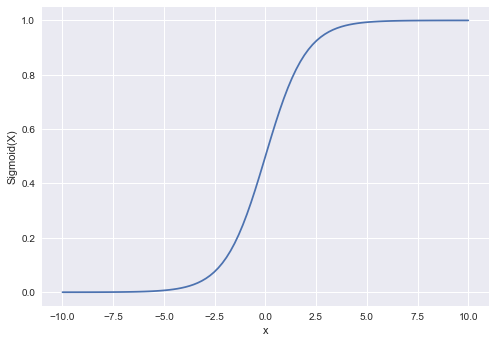

In [113]:
plt.style.use('seaborn')
import matplotlib.pyplot as plt 
x, z = np.linspace(-10, 10, 100), 1/(1 + np.exp(-x))
plt.xlabel("x") , plt.ylabel("Sigmoid(X)")
plt.plot(x, z)

*Let's also write an eqauation.*

![\begin{equation*}
f(x) = 1 +  \frac{1}{(1+e^{-x})}
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0Af%28x%29+%3D+1+%2B++%5Cfrac%7B1%7D%7B%281%2Be%5E%7B-x%7D%29%7D%0A%5Cend%7Bequation%2A%7D)

**Simply put:**


- I am dividing either extra high number by 1 => I am getting numbers near value of 0
- or extra lower numbers +1 and therefore I am getting number near value of 1

*We would prefer of having numbers centered between ZERO, but sigmoid is centering values between 0 and 1, we need to transfer our function a little bit.*

<div class="alert alert-block alert-info"><b>Tanh</b></div>

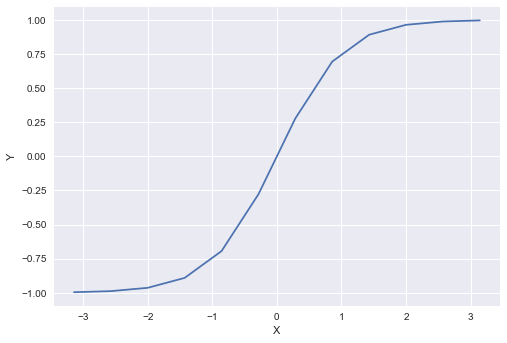

In [114]:
in_array, out_array = np.linspace(-np.pi, np.pi, 12), np.tanh(in_array) 
plt.plot(in_array, out_array), plt.xlabel("X"), plt.ylabel("Y") 
plt.show()

*It's just scaled version of sigmoid function. But the center is within a 0 values, so the activation function is improved!*

![\begin{equation*}
tanh(a) = \frac{exp(2a)-1}{exp(2a)+1}
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0Atanh%28a%29+%3D+%5Cfrac%7Bexp%282a%29-1%7D%7Bexp%282a%29%2B1%7D%0A%5Cend%7Bequation%2A%7D)

![\begin{equation*}
tanh(x) = \frac{e^x -e^{-x}}{e^x +e^{-x}}
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0Atanh%28x%29+%3D+%5Cfrac%7Be%5Ex+-e%5E%7B-x%7D%7D%7Be%5Ex+%2Be%5E%7B-x%7D%7D%0A%5Cend%7Bequation%2A%7D)

<div class="alert alert-block alert-danger"><b>Vanishing Gradient Problem</b></div>

*Firstly let's look at plot of sigmoid derivative.*

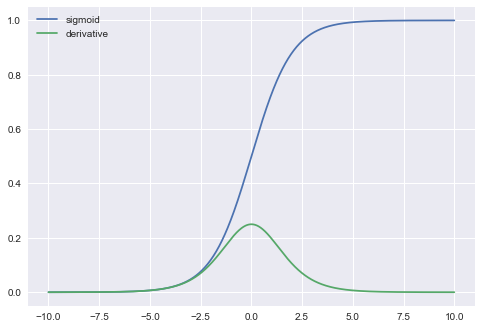

In [115]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def derivative(x):
    y = [(1/(1 + np.exp(-i))) * (1 - (1 /(1 + np.exp(-i)))) for i in x]
    return y

x = np.linspace(-10, 10, 1000)

y1 = sigmoid(x)
y2 = derivative(x)

plt.plot(x, y1, label='sigmoid')
plt.plot(x, y2, label='derivative')
plt.legend(loc='upper left')
plt.show()

**Explenation**

- we calculate Gradient for our layer which is derivative of sigmoid function
- but derivative from sigmoid function generates smaller numbers
- and if we have more and more layers we are calculating gradient for multiple layers meaning sigma multiplied by sigma and so on => which generates even lower numbers
- **THE FURTHER WE GO BACK IN NEURAL NETWORK - THE SMALLER GRADIENT WE GET AKA - VANISHING GRADIENT PROBLEM**

<div class="alert alert-block alert-info"><b>Tip:</b>ReLU - Rectifier linear unit</div>

*Through time was generated a lot of theories, but the simple solution turned out to be the best one. Just don't use activation function which has vanishing gradient. And here comes to the scene ReLU function*

![Loss](dl5.png)

*Derviative is easy, for negative values we have derivative equal to zero, and for linear part we have just constant value 1. The left side is well known as the dead neuron problem. To deal with this issue, some modificated versions of ReLU were created, some examples below:*

![Loss](dl6.jpg)

*Modificated versions recreate past issues such as vanishing gradient and center not to be around zero, so at the end the classic Relu is a good default option.*

<div class="alert alert-block alert-danger"><b>BeAware:</b> Relu is only for hidden layers. For output (meaning at the end of our net - we have either Sigmoid (binary classification) or Softmax (multiclass clasificiation) or None </div>

<div class="alert alert-block alert-info"><b>MultiClass Classification</b></div>

*For binary classification we are just using sigmoid, if we have one output we end up with values under 0.5 or over 0.5 and we evaluate based on that. But for multiclass evaluations we need to sum probabilities of all outputs and we are just dividing by values we get from our net, for that we are using Softmax function.*

![\begin{equation*}
\ \sum_{k=1}^Kp(y=k|x) = \frac{\sum_{k=1}^Kexp(a_k)}{{\sum_{j=1}^Kexp(a_j)}}=1
\end{equation*}](https://render.githubusercontent.com/render/math?math=%5CHuge+%5Ctextstyle+%5Cbegin%7Bequation%2A%7D%0A%5C+%5Csum_%7Bk%3D1%7D%5EKp%28y%3Dk%7Cx%29+%3D+%5Cfrac%7B%5Csum_%7Bk%3D1%7D%5EKexp%28a_k%29%7D%7B%7B%5Csum_%7Bj%3D1%7D%5EKexp%28a_j%29%7D%7D%3D1%0A%5Cend%7Bequation%2A%7D)

*An easiest way how to understand it, is that it is just "weighted average" of multiple sigmoid functions.*

![Loss](dl7.png)

*Just a summary how net is composed. Linear regression does not need activation function, nothing to evaluate, the end of neuron net for Binary classification is just a sigmoid function and for multiclass we use Softmax.*

<div class="alert alert-block alert-warning"><b>Theoretical part: images</b></div>

- every image has height and width (pixels x pixels)
- every image is composed from three layers (if we assume RGB schema)
- where R,G,B has values from 0-255 (8bits/1byte)
- if we have grayscale images we have only 0 = Black, 255 = White and therefore we don't need 3 layers
- for NN we will scale our RGB values to 0-1
- but for VGG it has to be preprocess, because VGG is using range 256 center around 0
- our Matrice is NxD, where N = number of samples and D is height x width x colors => we will flatten the image

![Loss](dl8.jpg)

*Note: it's alway good to have at least one cute cat in notebook, to compensate all the "boring" stuff*

## Coding - ANN for classification and regression

<div class="alert alert-block alert-warning"><b>ANN Classification - MNIST</b></div>

*This is classical starter classification problem, which can be done very easily using regular machine learning. But the purpose is to look at how to implement ANN with TensorFlow & Keras.*

In [80]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import tensorflow as tf

*Loading our data...*

In [81]:
mnist = tf.keras.datasets.mnist

In [85]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#data are loaded in tuple

11493376/11490434 [==============================] - 2s 0us/step


In [87]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [100]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #scaling

*Building our model...*

In [101]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), #from Nx28x28 to Nx784 (N number of samples)
    tf.keras.layers.Dense(128, activation="relu"), #relu is activation and 128 is just
    #hyperparameter for tuning
    tf.keras.layers.Dropout(0.2), #this part is something like feature selecting...
    #NN is dropping some features...
    tf.keras.layers.Dense(10, activation="softmax") #we have 10 digits (0-9) and
    #because we are doing multiclass classification we want to have a softmax function
])

*Here we actually build a model, simple one but still. Now compile:*

In [103]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy", #it's our loss function
            #it is sparse matrix because our label will have 9 columns after 
            #one hot encdoing - but 90% of values in a row are 0
            metrics=["accuracy"])


*Let's train our model.*

In [104]:
result = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2979 - accuracy: 0.9122 - val_loss: 0.1386 - val_accuracy: 0.9593
Epoch 2/20
60000/60000 [==============================] - 4s 62us/sample - loss: 0.1441 - accuracy: 0.9570 - val_loss: 0.1009 - val_accuracy: 0.9703
Epoch 3/20
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1090 - accuracy: 0.9671 - val_loss: 0.0885 - val_accuracy: 0.9733
Epoch 4/20
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0892 - accuracy: 0.9725 - val_loss: 0.0798 - val_accuracy: 0.9759
Epoch 5/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0745 - accuracy: 0.9759 - val_loss: 0.0730 - val_accuracy: 0.9776
Epoch 6/20
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0656 - accuracy: 0.9786 - val_loss: 0.0778 - val_accuracy: 0.9769
Epoch 7/20
60000/60000 [==============================] 

*Training is done now some plots to visualize my training.*

(<matplotlib.legend.Legend at 0x28ba8651608>,
 <matplotlib.legend.Legend at 0x28ba869f9c8>)

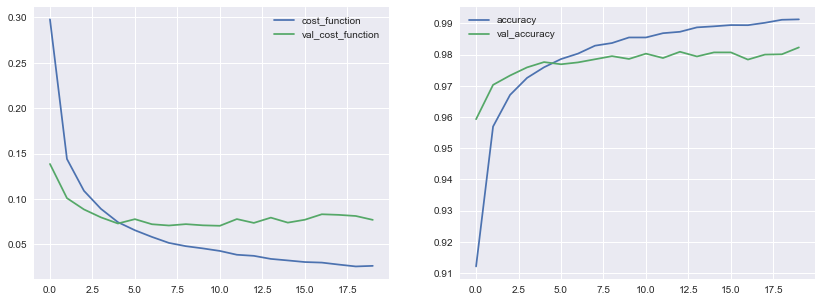

In [116]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(14,5))
axs[0].plot(result.history['loss'], label='cost_function')
axs[0].plot(result.history['val_loss'], label='val_cost_function')
axs[1].plot(result.history['accuracy'], label='accuracy')
axs[1].plot(result.history['val_accuracy'], label='val_accuracy')
axs[0].legend(), axs[1].legend()

*Just a typical results, more we train the better result we get.*

In [123]:
model.evaluate(x_test,y_test);

10000/10000 [==============================] - 0s 36us/sample - loss: 0.0770 - accuracy: 0.9823


<p style="background:black">
<code style="background:black;color:white">Cost: 0.077013810419011, Accuracy: 0.9823
</code>
</p>

*I can see that my 20 iterations slightly overfitted the model. I have better result on training than on test evaluation. We can check results using confusion matrix, will use very handy function from LP.*

In [128]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Confusion matrix, without normalization
[[ 973    1    0    0    0    1    2    0    1    2]
 [   0 1128    4    0    0    0    1    0    2    0]
 [   2    1 1017    1    2    0    1    6    2    0]
 [   0    0    4  989    0    6    0    3    3    5]
 [   0    0    3    1  968    0    3    1    1    5]
 [   2    0    0   10    1  868    5    1    4    1]
 [   4    3    1    1    6    4  935    0    3    1]
 [   1    5    8    2    0    0    0 1009    2    1]
 [   3    0    1    6    4    2    1    4  950    3]
 [   1    3    0    5    6    3    0    4    1  986]]


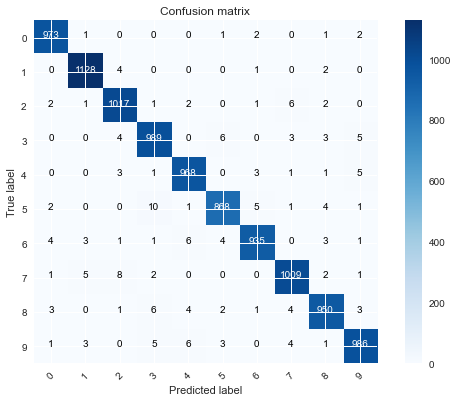

In [129]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

*Now it is easy to interpret the results. For example, we made a six misclassification in column 7 and row 10, when we predict image as a number 4, but true value was 9, mainly because the heads of these numbers are very similar. And I could continue with another examples, but it is not necessary.*

In [388]:
def show_false_class():
    false_classification = np.where(p_test != y_test)[0]
    i = np.random.choice(false_classification)
    plt.title(f"True label:{y_test[i]} and Predicted: {p_test[i]}")
    return plt.imshow(x_test[i], cmap='gray')

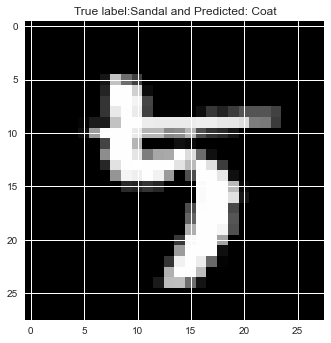

In [389]:
show_false_class()

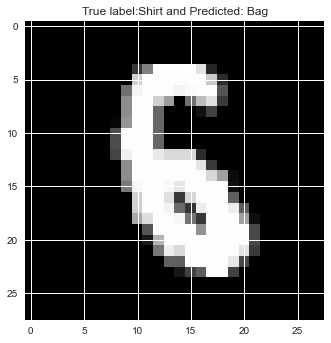

In [383]:
show_false_class()

*We can see that our algorithm predicted pretty well, and most mistakes are done because of bad handwriting. In this case we could inspect where we are making most mistakes and try to change our algorithm for some parts, maybe some constraint would help.*

<div class="alert alert-block alert-warning"><b>ANN Regression - Random data</b></div>

*Note: using syntetic data is good practice for understanding how ML algorithms works. For example this charts is really great for creating intuition!*

![Loss](dl8.png)

**So our random data:**

In [256]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # random creates -1+1 ..so I will get +4-4
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])#the function is bellow

$$ y = \cos(2x_1) + cos(3x_2) $$

In [257]:
X.max(), X.min()

(2.9983538687860616, -2.9992626834392375)

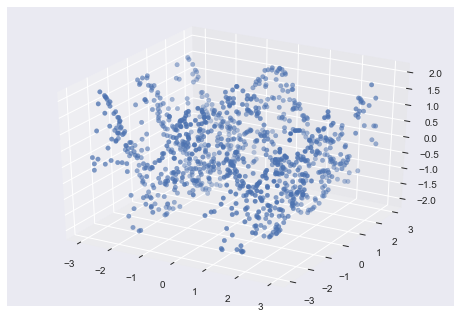

In [368]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [259]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), #2-only two feature
    tf.keras.layers.Dense(1) #no function here - regression
])

In [260]:
opt = tf.keras.optimizers.Adam(0.01) #better for this purose

Link for Adam hyperparameters: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [261]:
model.compile(optimizer=opt, loss="mse") 
#compiling with different learning rate than defaul one

In [262]:
result = model.fit(X,Y, epochs=100)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 402us/sample - loss: 1.0632
Epoch 2/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.9732
Epoch 3/100
1000/1000 [==============================] - 0s 39us/sample - loss: 0.9570
Epoch 4/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.9479
Epoch 5/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.9154
Epoch 6/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.8581
Epoch 7/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.7558
Epoch 8/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.7430
Epoch 9/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.7235
Epoch 10/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.6343
Epoch 11/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.5930
Epoch 12/100
1000/

Epoch 94/100
1000/1000 [==============================] - 0s 36us/sample - loss: 0.0098
Epoch 95/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.0157
Epoch 96/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0150
Epoch 97/100
1000/1000 [==============================] - 0s 37us/sample - loss: 0.0089
Epoch 98/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0091
Epoch 99/100
1000/1000 [==============================] - 0s 38us/sample - loss: 0.0099
Epoch 100/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0180


*Good old cost plot.*

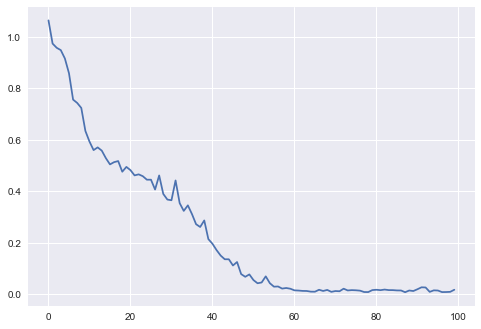

In [263]:
plt.plot(result.history['loss'], label='loss')

*Now let's plot 3D plot with our train data and real data. But firstly some explenation of some functions to make syntax crystal clear!*

<div class="alert alert-block alert-danger"><b>NOTE:</b>I am just explaining some numpy function to (to myself?) understand 3D plotting (bellow) better.</div>

**Flatten**

In [318]:
unflatted = [[1],[2],[3],[4],[5]]

In [319]:
unflatted = np.array(unflatted) 

In [320]:
unflatted

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [321]:
unflatted.flatten()

array([1, 2, 3, 4, 5])

*Well the name of the function describe the purpose pretty well, let's proceed with another one.*

**vstack**

In [322]:
unstack = [1,2,3,4,5]

In [325]:
np.vstack(unstack)

array([[1],
       [2],
       [3],
       [4],
       [5]])

*This function is doing just an opposite of flatten function.*

**Transpose - this one is probably clear, but why not**

In [347]:
T = np.array([[1,2.0],[0,0],(1+1j,3.)])

In [348]:
T

array([[1.+0.j, 2.+0.j],
       [0.+0.j, 0.+0.j],
       [1.+1.j, 3.+0.j]])

In [349]:
T.T

array([[1.+0.j, 0.+0.j, 1.+1.j],
       [2.+0.j, 0.+0.j, 3.+0.j]])

**Linspace**

In [292]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

*Function recieves a range of points of number and generate numbers seperated by the same amount.*

In [298]:
np.linspace(0,20,5)
#range 0-20, 5 steps so with 4 numbers..

array([ 0.,  5., 10., 15., 20.])

**Meshgrid**

In [284]:
x = [1, 2]
y = [1, 2, 3] 
x_1, y_1 = np.meshgrid(x, y) 

In [285]:
x_1

array([[1, 2],
       [1, 2],
       [1, 2]])

In [286]:
y_1

array([[1, 1],
       [2, 2],
       [3, 3]])

In [281]:
x = [1, 2]
y = [1, 2, 3] 
x_1, y_1 = np.meshgrid(y, x) 

In [282]:
x_1

array([[1, 2, 3],
       [1, 2, 3]])

In [283]:
y_1

array([[1, 1, 1],
       [2, 2, 2]])

![Loss](dl9.png)

*So meshgrid is connecting points between together. It is like drawing some kind of map, but we will make this in 3D, so you think of that as a group of 3D lines.*

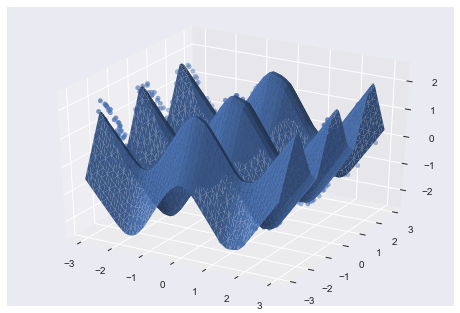

In [374]:
#firstly our 3d scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y) 

#Now prediction - but with surface plot, firstly generate new data
line = np.linspace(-3, 3, 50) #just generates 50 numbers between -3,3
xx, yy = np.meshgrid(line, line) #now I am connecting points 
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T #it creates 2500 x 2 
Yhat = model.predict(Xgrid).flatten() #predicted values 2500
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show() #3D plot but with surface

*So we have here our training and prediction data. Bottom line:*

$$ y = \cos(2x_1) + cos(3x_2) $$

**Algorithm learned that outputs are from this equations, and it's able to predict Y values (from X1,X2 if they are in range (-3) - (+3)) without using cos funcion at all, quite neat.**

__________________

***The End***